In [18]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

# Exercice 3 :

In [20]:
file_mnist_train="/content/gdrive/MyDrive/M2 DS/Machine Learning avec Panloup/mnist_train.csv"
file_mnist_test="/content/gdrive/MyDrive/M2 DS/Machine Learning avec Panloup/mnist_test.csv"

# Les colonnes ne sont pas nommées donc on les nommes telles que : 0 | 1 | 2 | .... | 784 .
mnist_train = pd.read_csv(file_mnist_train,names = np.arange(0,785))
mnist_test = pd.read_csv(file_mnist_test,names = np.arange(0,785))

In [21]:
# Pour les Y on prend la première colonne, et le reste c'est les X
Y_train = mnist_train.iloc[:, 0]
X_train = mnist_train.iloc[:, 1:]

Y_test = mnist_test.iloc[:, 0]
X_test = mnist_test.iloc[:, 1:]

La valeur est :  5


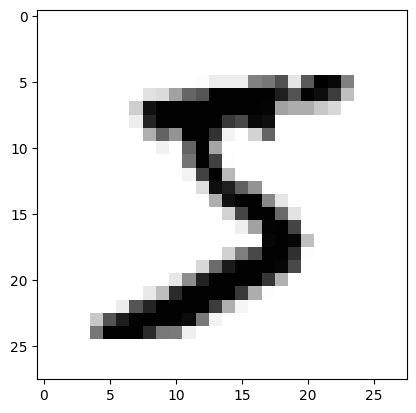

In [22]:
# On choisi l'individu 0 et ensuite on le reforme comme une matrice 28x28
obs0 = pd.DataFrame(X_train.iloc[0, :].values.reshape(28,28))
print('La valeur est : ', Y_train.iloc[0])
plt.imshow(255 - obs0.values, cmap='gray') # le " 255- " c'est pour inverser la couleur blanc et noir
plt.show()

In [23]:
# On prend un échantillon de taille 12 000 des valeurs d'entraînement
ech_train = mnist_train.sample(n=12000)
Y_train = ech_train.iloc[:, 0]
X_train = ech_train.iloc[:, 1:]
X_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
28453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# On prend un échantillon de taille 500 des valeurs de test
ech_test = mnist_test.sample(n=500)
Y_test = ech_test.iloc[:, 0]
X_test = ech_test.iloc[:, 1:]
X_test

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
2728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Algorithme de KNN avec 10 voisins

In [25]:
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train, Y_train)
Y_pred = clf_knn.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(f'Précision du modèle KNN : {accuracy}')

Précision du modèle KNN : 0.948


Erreur de classification : 0.052000000000000046


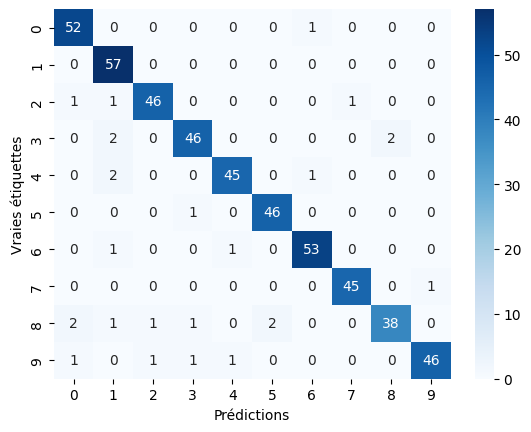

In [26]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred) # Matrice de confusion
classification_error = 1 - metrics.accuracy_score(Y_test, Y_pred)
print(f"Erreur de classification : {classification_error}")

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues") # pour afficher la matrice de confusion d'une manière plus "jolie"
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

### Recherche du meilleur estimateur

In [27]:
knn_classifier = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,11)} # On cherche pour le nombre de voisin entre 1 et 10
grid_search = GridSearchCV(estimator = knn_classifier, param_grid=param_grid)
grid_search.fit(X_train, Y_train)
best_neighbors = grid_search.best_params_['n_neighbors']
print("Meilleur paramètre :", best_neighbors)

best_clf_knn = grid_search.best_estimator_ # Le meilleur estimateur par rapport au paramètre utilisé
Y_pred = best_clf_knn.predict(X_test)
accuracy = best_clf_knn.score(X_test, Y_test)
print("Précision sur l'ensemble de test:", accuracy)

Meilleur paramètre : 1
Précision sur l'ensemble de test: 0.946


Erreur de classification : 0.05400000000000005


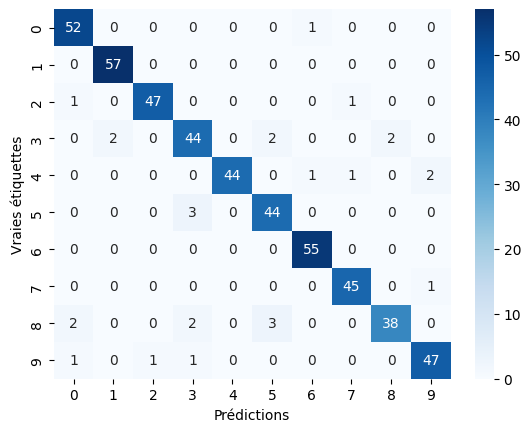

In [28]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred) # Matrice de confusion du meilleur estimateur
classification_error = 1 - metrics.accuracy_score(Y_test, Y_pred)
print(f"Erreur de classification : {classification_error}")

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

#### Les mauvaises prédictions du meilleur estimateur

In [29]:
n_mal_predit = sum(list(Y_test)!= Y_pred)
print("Le nombre de mauvaises prédictions : ", n_mal_predit )

Le nombre de mauvaises prédictions :  27


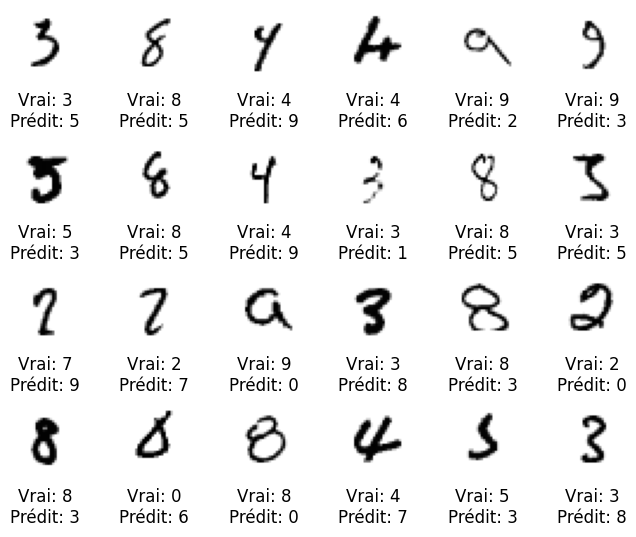

In [30]:
mauvaises_predictions = X_test.reset_index().drop('index', axis=1).loc[list(Y_test) != Y_pred] # La liste des individus qui ont été mal prédit
fig, axes = plt.subplots(4, int(n_mal_predit/4), figsize=(8, 6)) # pour afficher les mauvaises prédictions on créer une grille
plt.subplots_adjust(wspace=0.5, hspace=1)
for ax, k in zip(axes.flatten(), mauvaises_predictions.index):
    obs = mauvaises_predictions.loc[k].values.reshape(28, 28) # On reshape chaque mauvaise prédiction et on l'affiche
    ax.imshow(255 - obs, cmap='gray')
    ax.set_title(f"Vrai: {list(Y_test)[k]}\nPrédit: {Y_pred[k]}",y=-.90, fontsize=12)
    ax.axis('off')
plt.show()

In [31]:
Y = [list(Y_test)[i] for i in mauvaises_predictions.index]
nombre_apparitions = {v: Y.count(v) for v in set(Y)}  # Dictionnaire des occurrences de chaque élément
element_plus_frequent = max(nombre_apparitions, key=nombre_apparitions.get)
print("L'élément qui est le plus souvent mal prédit c'est le", element_plus_frequent, 'et cela', nombre_apparitions[element_plus_frequent],'fois')

L'élément qui est le plus souvent mal prédit c'est le 8 et cela 7 fois


In [32]:
Y = [list(Y_pred)[i] for i in mauvaises_predictions.index]
nombre_apparitions = {v: Y.count(v) for v in set(Y)}
element_plus_frequent = max(nombre_apparitions, key=nombre_apparitions.get)

print("L'élément le plus souvent donné sur une mauvaise prédiction est le", element_plus_frequent,  'et cela', nombre_apparitions[element_plus_frequent],'fois')

L'élément le plus souvent donné sur une mauvaise prédiction est le 3 et cela 6 fois


### Recherche du meeilleur estimateur en changeant le métrique
Lorsque le paramètre n_neigbors est une liste de 1 à 10, le calcul prend énormément de temps donc on prend une liste de 1 à 5 et on réduit la taille de l'échantillon.

In [33]:
ech_train = mnist_train.sample(n=6000)
Y_train = ech_train.iloc[:, 0]
X_train = ech_train.iloc[:, 1:]

ech_test = mnist_test.sample(n=500)
Y_test = ech_test.iloc[:, 0]
X_test = ech_test.iloc[:, 1:]

In [34]:
knn_classifier = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,5),
              'metric' : ['euclidean','manhattan','cosine'],
              'weights' : ['distance', 'uniform' ]}
grid_search = GridSearchCV(estimator = knn_classifier, param_grid=param_grid)
grid_search.fit(X_train, Y_train)
print("Meilleurs paramètres :", grid_search.best_params_)

best_clf_knn = grid_search.best_estimator_
Y_pred = best_clf_knn.predict(X_test)
accuracy = best_clf_knn.score(X_test, Y_test)
print("Précision sur l'ensemble de test:", accuracy)

n_mal_predit = sum(list(Y_test)!= Y_pred)
print("Le nombre de mauvaises prédictions : ", n_mal_predit )

Meilleurs paramètres : {'metric': 'cosine', 'n_neighbors': 4, 'weights': 'distance'}
Précision sur l'ensemble de test: 0.952
Le nombre de mauvaises prédictions :  24


Erreur de classification : 0.04800000000000004


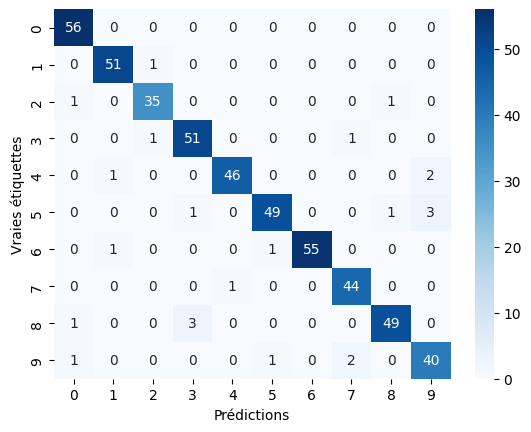

In [35]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred) # Matrice de confusion du meilleur estimateur
classification_error = 1 - metrics.accuracy_score(Y_test, Y_pred)
print(f"Erreur de classification : {classification_error}")

sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()